In [9]:
import cv2
import easyocr
import pandas as pd
# Step 1: Image Preprocessing
def preprocess_image(image_path):
    # Load image using OpenCV
    image = cv2.imread(image_path)

    # Check if the image is loaded successfully
    if image is None:
        print(f"Error: Unable to load image from {image_path}")
        return None

    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply noise reduction techniques using Gaussian blur
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Perform edge detection if needed
    edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

    # Find contours to isolate the ID card
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Perform further processing to isolate and adjust perspective of the ID card

    return image



In [10]:
# Step 2: Text Recognition with EasyOCR
def extract_text(image):
    # Use EasyOCR to extract text
    reader = easyocr.Reader(['en'])  # Initialize with English language
    result = reader.readtext(image)

    # Extract text from the result
    text = ' '.join([entry[1] for entry in result])

    return text

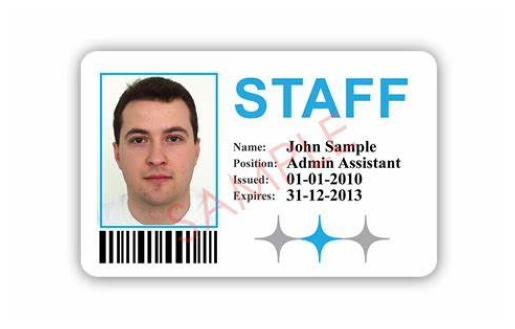

Extracted Text: STAFF Name: John Sample Position: Admin Assistant Ieenede 01-01-2010 Expires: 31-12-2013


In [12]:
# Test preprocessing
import matplotlib.pyplot as plt

image_path = "/content/sample_id_card.jpeg"
image = preprocess_image(image_path)
if image is not None:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


# Test OCR extraction
if image is not None:
    text = extract_text(image)
    print("Extracted Text:", text)

